## Imports and Loads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from importlib import reload
import src.utils.utils
reload(src.utils.utils)

<module 'src.utils.utils' from '/Users/annaellebenlamri/ada-2024-project-melyn/src/utils/utils.py'>

In [2]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

with open(pickle_folder + 'movies_clean.p', 'rb') as f:
    movie_data = pickle.load(f)

## Preparation of the data for the modeling

In [3]:
df_mod = movie_data.copy()

In [4]:
df_mod.columns

Index(['Wikipedia_movie_ID', 'Movie_name', 'Movie_box_office_revenue', 'Year',
       'Year_Interval', 'nb_of_Genres', 'Genre_Action',
       'Genre_Action/Adventure', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Biographical film', 'Genre_Biography', 'Genre_Black comedy',
       'Genre_Black-and-white', 'Genre_Bollywood', 'Genre_Chinese Movies',
       'Genre_Comedy', 'Genre_Comedy film', 'Genre_Comedy-drama',
       'Genre_Crime Fiction', 'Genre_Crime Thriller', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family Drama', 'Genre_Family Film',
       'Genre_Fantasy', 'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War

In [5]:
# Drop some columns
df_mod.drop(columns=['Movie_box_office_revenue', 'Movie_name', 'Wikipedia_movie_ID', 'Year_Interval'], inplace=True)

In [6]:
df_mod[df_mod.isnull().any(axis=1)]

,Year,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,Genre_Black-and-white,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes


In [7]:
df_mod.dtypes

Year                                  int64
nb_of_Genres                          int64
Genre_Action                           bool
Genre_Action/Adventure                 bool
Genre_Adventure                        bool
                                     ...   
Country_Other                          bool
Country_United Kingdom                 bool
Country_United States of America       bool
averageRating                       float64
numVotes                            float64
Length: 69, dtype: object

## Modeling

In [8]:
# Define features and target
X = df_mod.drop(columns=['averageRating'])
y = df_mod['averageRating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear regression MSE: ", mse_lr)
print("Linear regression R2: ", r2_lr)

Linear regression MSE:  0.6924186541541996
Linear regression R2:  0.37063273413298126


### Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# Train and predict a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge regression MSE: ", mse_ridge)
print("Ridge regression R2: ", r2_ridge)

Ridge regression MSE:  0.6924208056160872
Ridge regression R2:  0.37063077858242277


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train and predict a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE: ", mse_rf)
print("Random Forest R2: ", r2_rf)

Random Forest MSE:  0.4877655550862092
Random Forest R2:  0.5566501971791882


### XGBoost

In [12]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost MSE: ", mse_xgb)
print("XGBoost R2: ", r2_xgb)

XGBoost MSE:  0.45747145694286484
XGBoost R2:  0.5841857258741414


### Bagging Regressor

In [13]:
from sklearn.ensemble import BaggingRegressor

# Train a Baggging Regressor model
bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)
print("Bagging Regressor MSE: ", mse_bag)
print("Bagging Regressor R2: ", r2_bag)

Bagging Regressor MSE:  0.5496585296583062
Bagging Regressor R2:  0.5003931741352325


### Gradient Boosting Regressor

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting MSE: ", mse_gb)
print("Gradient Boosting R2: ", r2_gb)

Gradient Boosting MSE:  0.502887360283913
Gradient Boosting R2:  0.5429053780077898


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE: ", mse_dt)
print("Decision Tree R2: ", r2_dt)

Decision Tree MSE:  0.9643364105618423
Decision Tree R2:  0.1234757087347883


## Comparison the mean squared error of the models

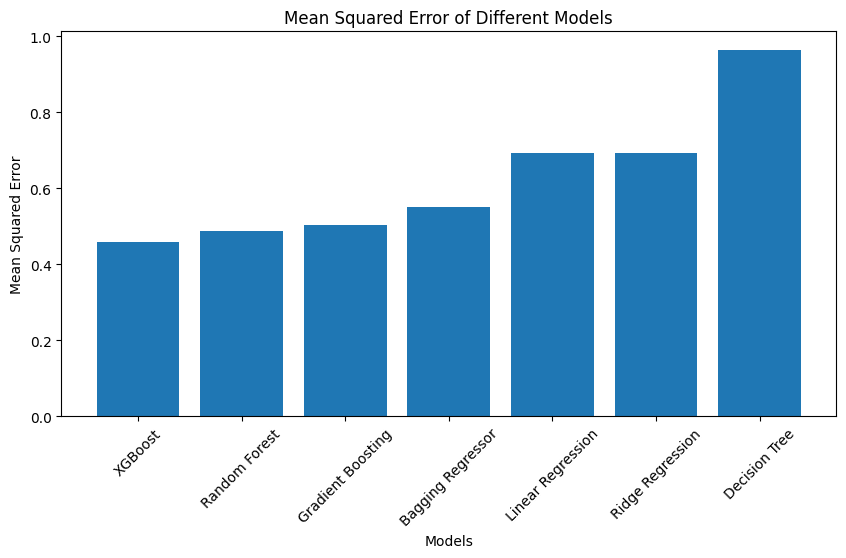

In [16]:
# Comparison the mean squared error of the models
models = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'Bagging Regressor', 'Gradient Boosting', 'Decision Tree']
errors = [mse_lr, mse_ridge, mse_rf, mse_xgb, mse_bag, mse_gb, mse_dt]

sorted_pairs = sorted(zip(errors, models))
sorted_errors, sorted_models = zip(*sorted_pairs)

plt.figure(figsize=(10, 5))
plt.bar(sorted_models, sorted_errors)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.xticks(rotation=45)
plt.show()

## Feature Importance of the two best models

XGBoost feature importance:                               Feature  Importance
17                 Genre_Documentary    0.195586
23                      Genre_Horror    0.065809
44                      lang_english    0.065069
18                       Genre_Drama    0.059122
66  Country_United States of America    0.052045
..                               ...         ...
45                       lang_french    0.003129
6            Genre_Biographical film    0.002869
40                    Genre_War film    0.002846
11              Genre_Chinese Movies    0.002777
59                   Country_Germany    0.002615

[68 rows x 2 columns]


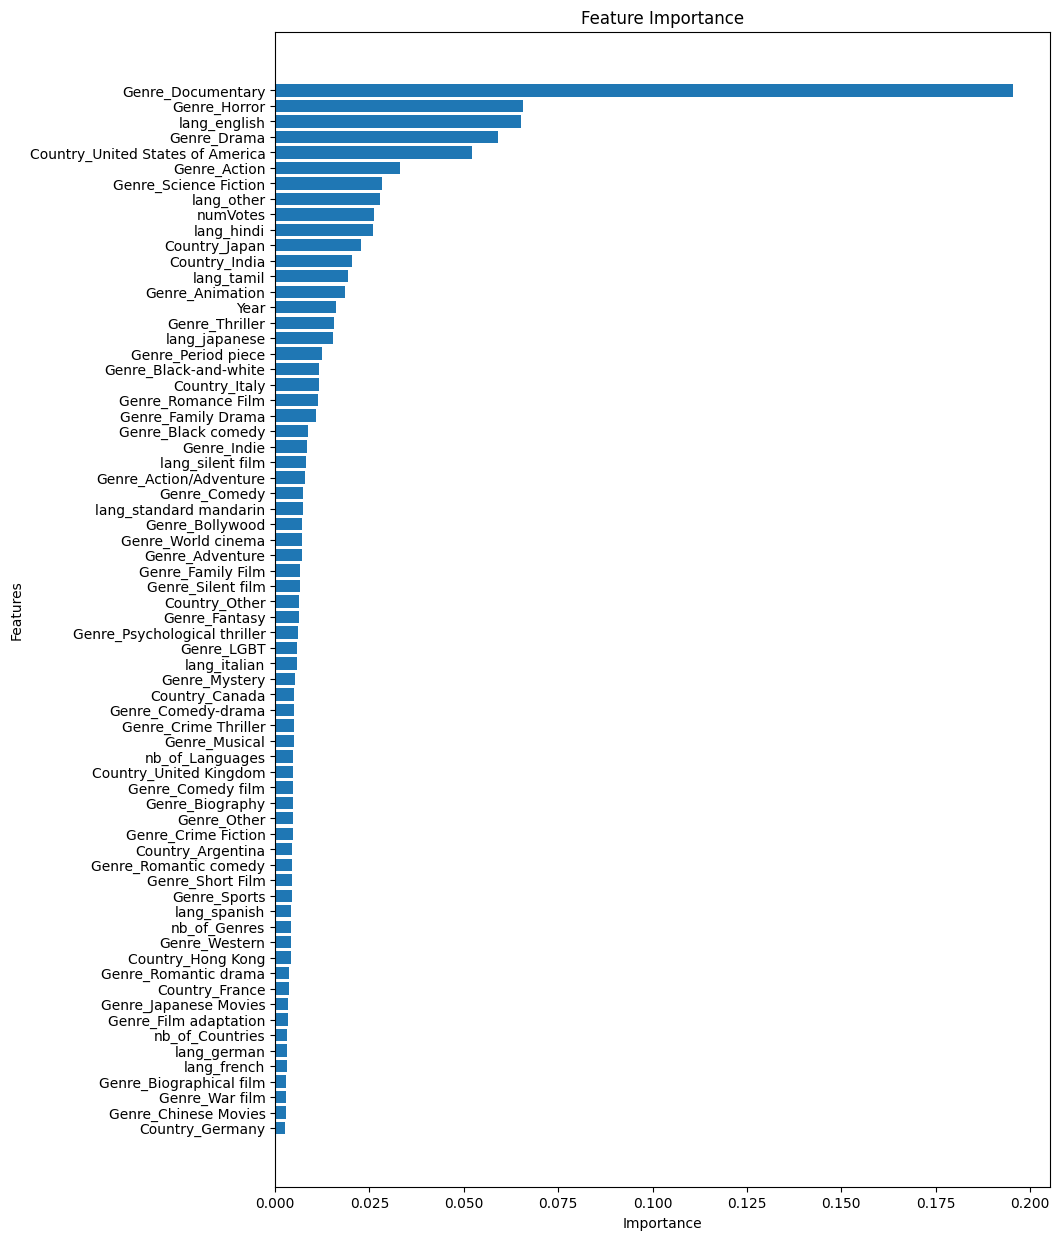

In [17]:
# Get feature importance for the XGBoost model
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_}).sort_values(by='Importance', ascending=False)
print("XGBoost feature importance: ", importance_df_xgb)

# Plot the feature importance for the XGBoost model
plt.figure(figsize=(10, 15))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Random Forest feature importance:                   Feature  Importance
67              numVotes    0.290696
0                   Year    0.171940
18           Genre_Drama    0.063016
17     Genre_Documentary    0.051611
1           nb_of_Genres    0.044406
..                   ...         ...
36      Genre_Short Film    0.000928
11  Genre_Chinese Movies    0.000762
37     Genre_Silent film    0.000737
51      lang_silent film    0.000419
56     Country_Argentina    0.000380

[68 rows x 2 columns]


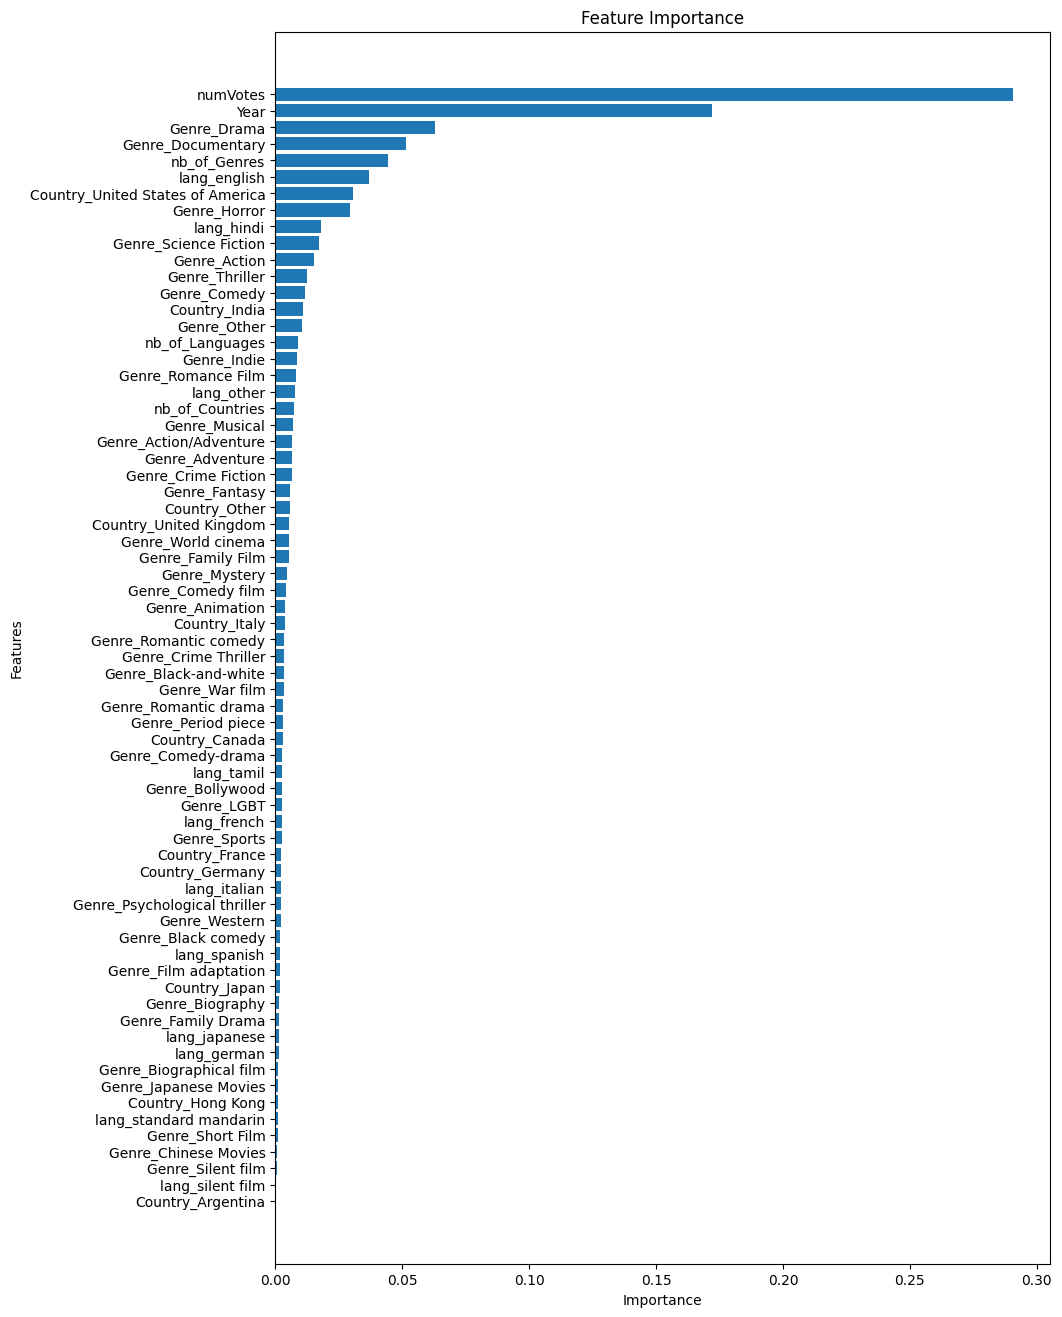

In [18]:
# Get feature importance for Random Forest model
importance_df_RF = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Random Forest feature importance: ", importance_df_RF)

# Plot the feature importance for the Random Forest model
plt.figure(figsize=(10, 16))
plt.barh(importance_df_RF['Feature'], importance_df_RF['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Modeling per Year_Interval

In [19]:
df_mod_2 = movie_data.copy()

In [20]:
df_mod_2.drop(columns=['Movie_box_office_revenue', 'Movie_name', 'Wikipedia_movie_ID'], inplace=True)

In [21]:
df_mod_2.columns

Index(['Year', 'Year_Interval', 'nb_of_Genres', 'Genre_Action',
       'Genre_Action/Adventure', 'Genre_Adventure', 'Genre_Animation',
       'Genre_Biographical film', 'Genre_Biography', 'Genre_Black comedy',
       'Genre_Black-and-white', 'Genre_Bollywood', 'Genre_Chinese Movies',
       'Genre_Comedy', 'Genre_Comedy film', 'Genre_Comedy-drama',
       'Genre_Crime Fiction', 'Genre_Crime Thriller', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family Drama', 'Genre_Family Film',
       'Genre_Fantasy', 'Genre_Film adaptation', 'Genre_Horror', 'Genre_Indie',
       'Genre_Japanese Movies', 'Genre_LGBT', 'Genre_Musical', 'Genre_Mystery',
       'Genre_Other', 'Genre_Period piece', 'Genre_Psychological thriller',
       'Genre_Romance Film', 'Genre_Romantic comedy', 'Genre_Romantic drama',
       'Genre_Science Fiction', 'Genre_Short Film', 'Genre_Silent film',
       'Genre_Sports', 'Genre_Thriller', 'Genre_War film', 'Genre_Western',
       'Genre_World cinema', 'nb_of_Languages'

In [22]:
df_mod_2.dtypes

Year                                  int64
Year_Interval                        object
nb_of_Genres                          int64
Genre_Action                           bool
Genre_Action/Adventure                 bool
                                     ...   
Country_Other                          bool
Country_United Kingdom                 bool
Country_United States of America       bool
averageRating                       float64
numVotes                            float64
Length: 70, dtype: object

In [23]:
df_mod_2[df_mod_2.isnull().any(axis=1)]

,Year,Year_Interval,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,Genre_Biographical film,Genre_Biography,Genre_Black comedy,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes


#### Using XGBoost model

Analyzing period: 1975-1995
Period 1975-1995 - XGBoost MSE: 0.5283
Period 1975-1995 - XGBoost R2: 0.5557
Period 1975-1995 - XGBoost feature importance:
                              Feature  Importance
50                        lang_other    0.118519
17                 Genre_Documentary    0.118288
44                      lang_english    0.063790
66  Country_United States of America    0.059265
18                       Genre_Drama    0.048861
..                               ...         ...
22             Genre_Film adaptation    0.002907
46                       lang_german    0.002855
25             Genre_Japanese Movies    0.002792
37                 Genre_Silent film    0.000000
51                  lang_silent film    0.000000

[68 rows x 2 columns]


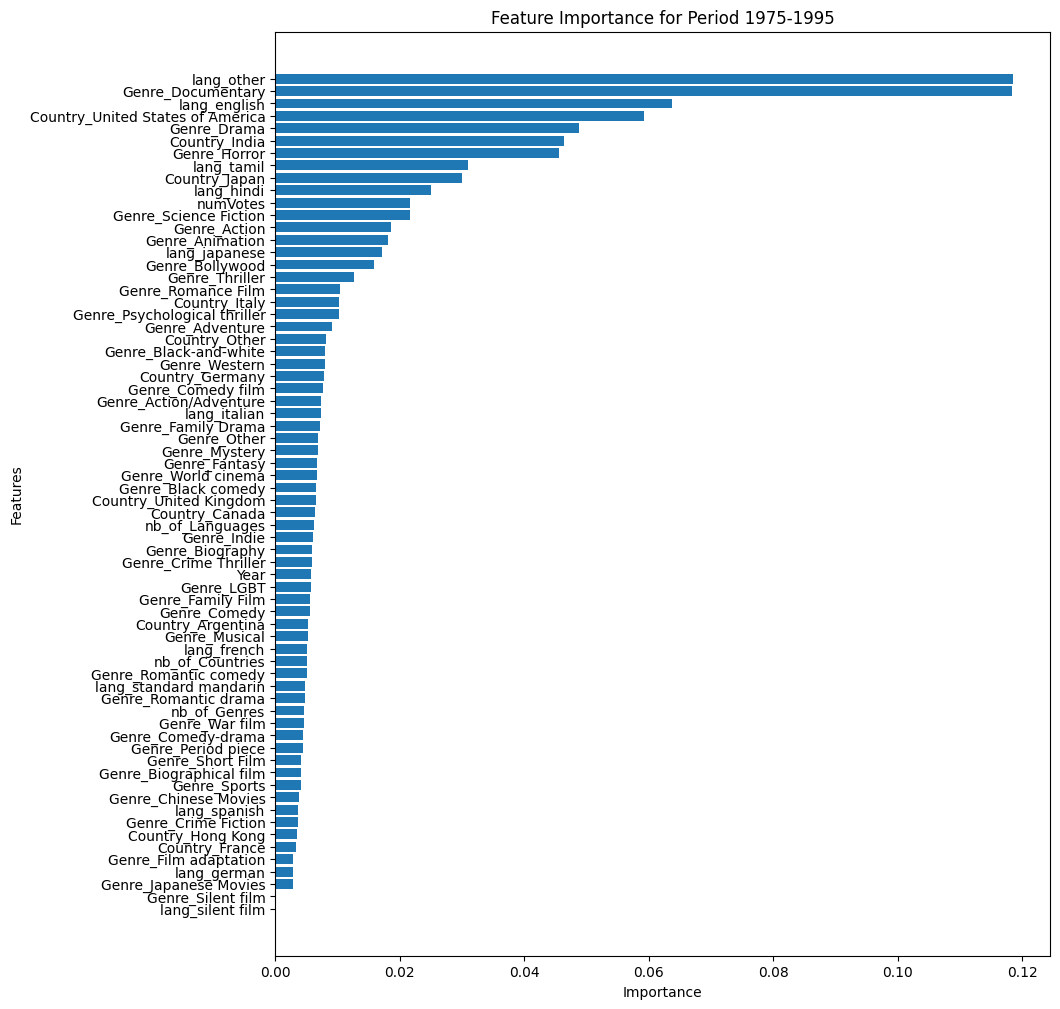

Analyzing period: 1915-1935
Period 1915-1935 - XGBoost MSE: 0.2789
Period 1915-1935 - XGBoost R2: 0.4787
Period 1915-1935 - XGBoost feature importance:
                              Feature  Importance
37                 Genre_Silent film    0.148948
39                    Genre_Thriller    0.128836
66  Country_United States of America    0.081926
44                      lang_english    0.059081
41                     Genre_Western    0.044797
..                               ...         ...
61                     Country_India    0.000000
47                        lang_hindi    0.000000
63                     Country_Japan    0.000000
5                    Genre_Animation    0.000000
49                     lang_japanese    0.000000

[68 rows x 2 columns]


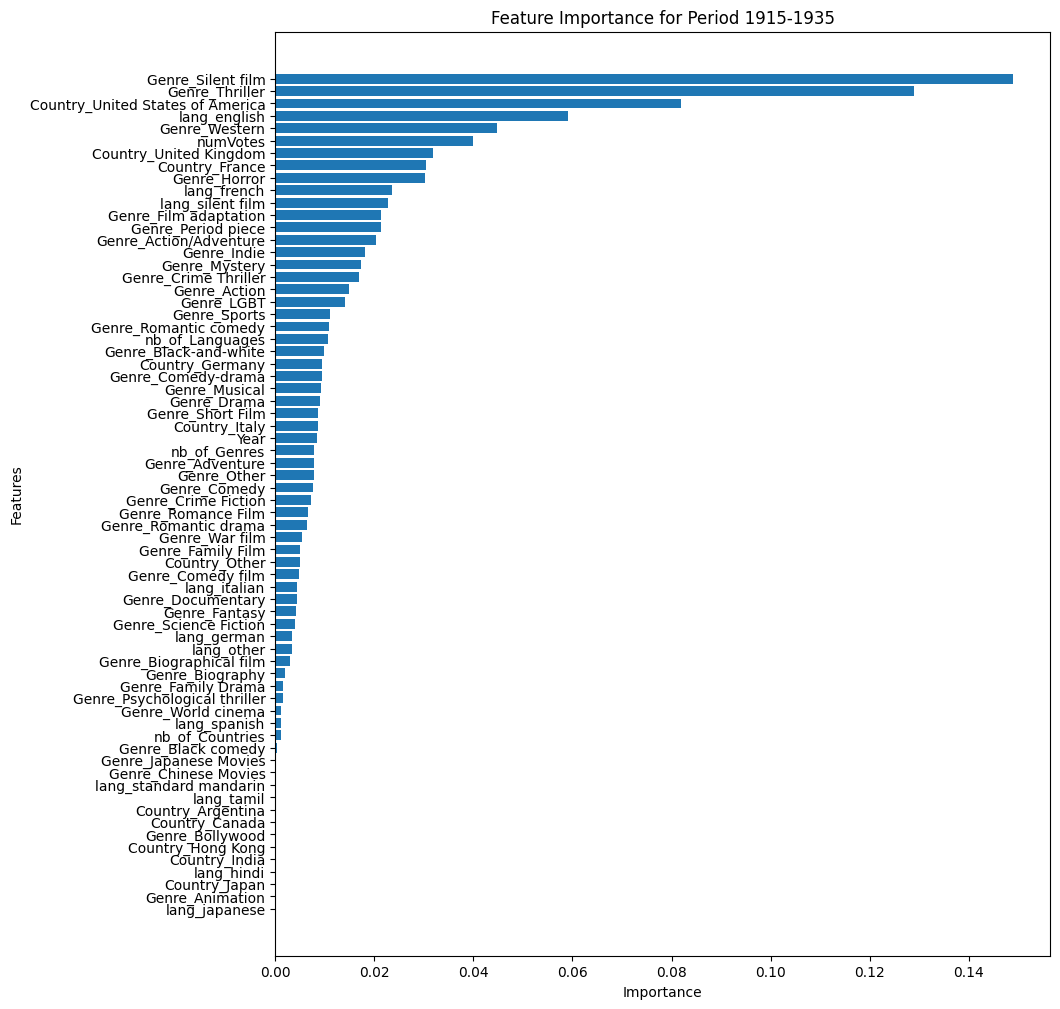

Analyzing period: 1955-1975
Period 1955-1975 - XGBoost MSE: 0.4267
Period 1955-1975 - XGBoost R2: 0.5496
Period 1955-1975 - XGBoost feature importance:
                   Feature  Importance
44           lang_english    0.149461
61          Country_India    0.087909
17      Genre_Documentary    0.082418
23           Genre_Horror    0.080448
35  Genre_Science Fiction    0.052277
..                    ...         ...
60      Country_Hong Kong    0.001410
26             Genre_LGBT    0.001392
10        Genre_Bollywood    0.000972
54             lang_tamil    0.000000
51       lang_silent film    0.000000

[68 rows x 2 columns]


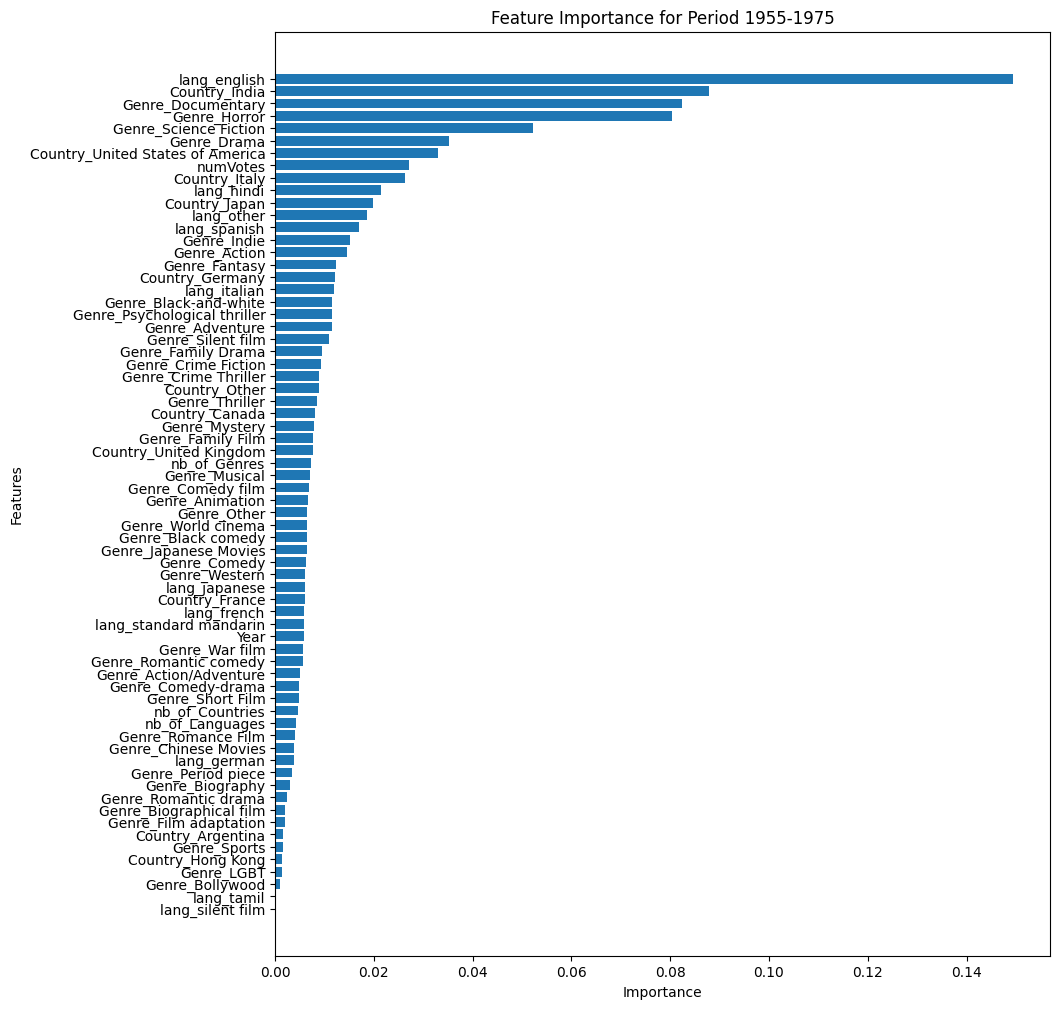

Analyzing period: 1995-2015
Period 1995-2015 - XGBoost MSE: 0.6402
Period 1995-2015 - XGBoost R2: 0.5109
Period 1995-2015 - XGBoost feature importance:
                              Feature  Importance
17                 Genre_Documentary    0.180379
23                      Genre_Horror    0.088872
66  Country_United States of America    0.081137
18                       Genre_Drama    0.062186
63                     Country_Japan    0.042704
..                               ...         ...
22             Genre_Film adaptation    0.002425
11              Genre_Chinese Movies    0.002386
41                     Genre_Western    0.002173
9              Genre_Black-and-white    0.000649
51                  lang_silent film    0.000000

[68 rows x 2 columns]


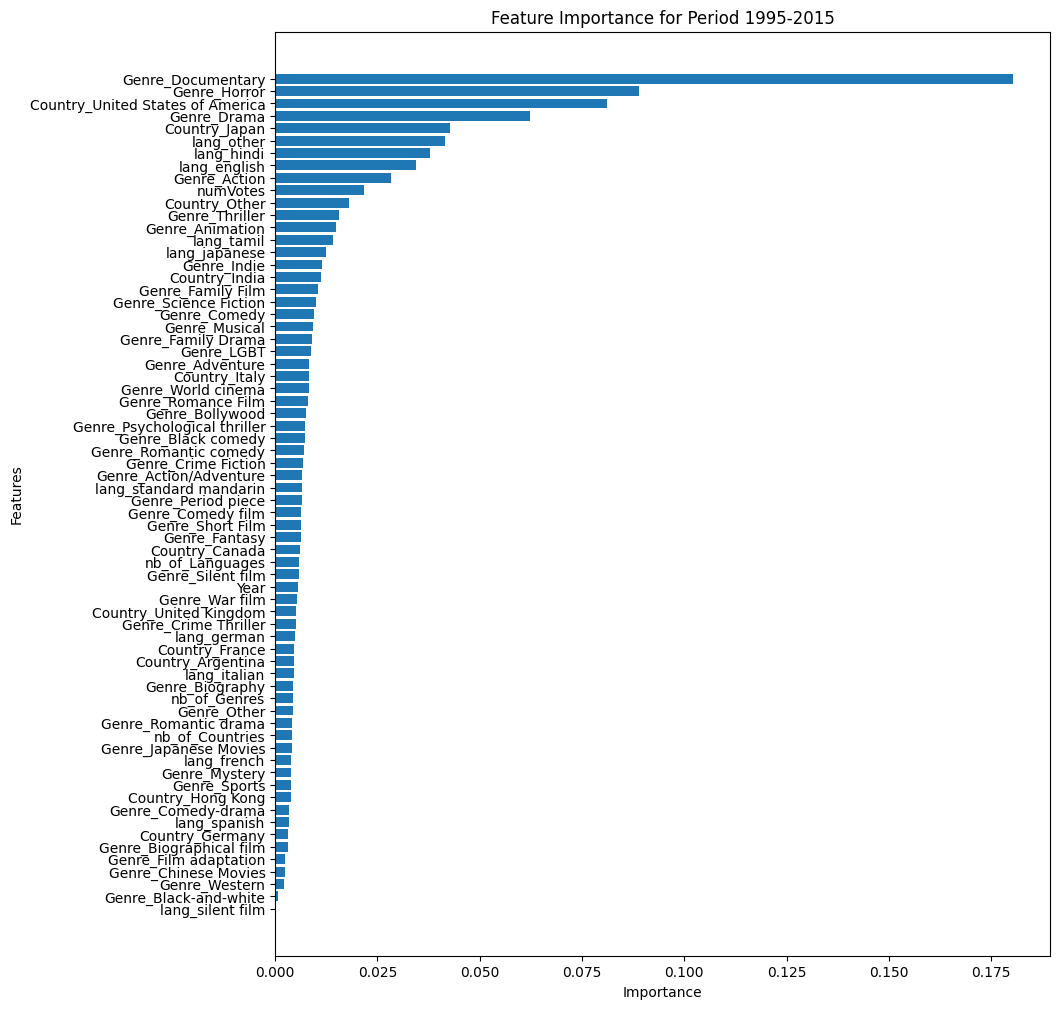

Analyzing period: 1935-1955
Period 1935-1955 - XGBoost MSE: 0.2906
Period 1935-1955 - XGBoost R2: 0.4168
Period 1935-1955 - XGBoost feature importance:
                   Feature  Importance
35  Genre_Science Fiction    0.254526
44           lang_english    0.138676
23           Genre_Horror    0.046851
67               numVotes    0.043743
54             lang_tamil    0.041610
..                    ...         ...
57         Country_Canada    0.000000
51       lang_silent film    0.000000
60      Country_Hong Kong    0.000000
63          Country_Japan    0.000000
26             Genre_LGBT    0.000000

[68 rows x 2 columns]


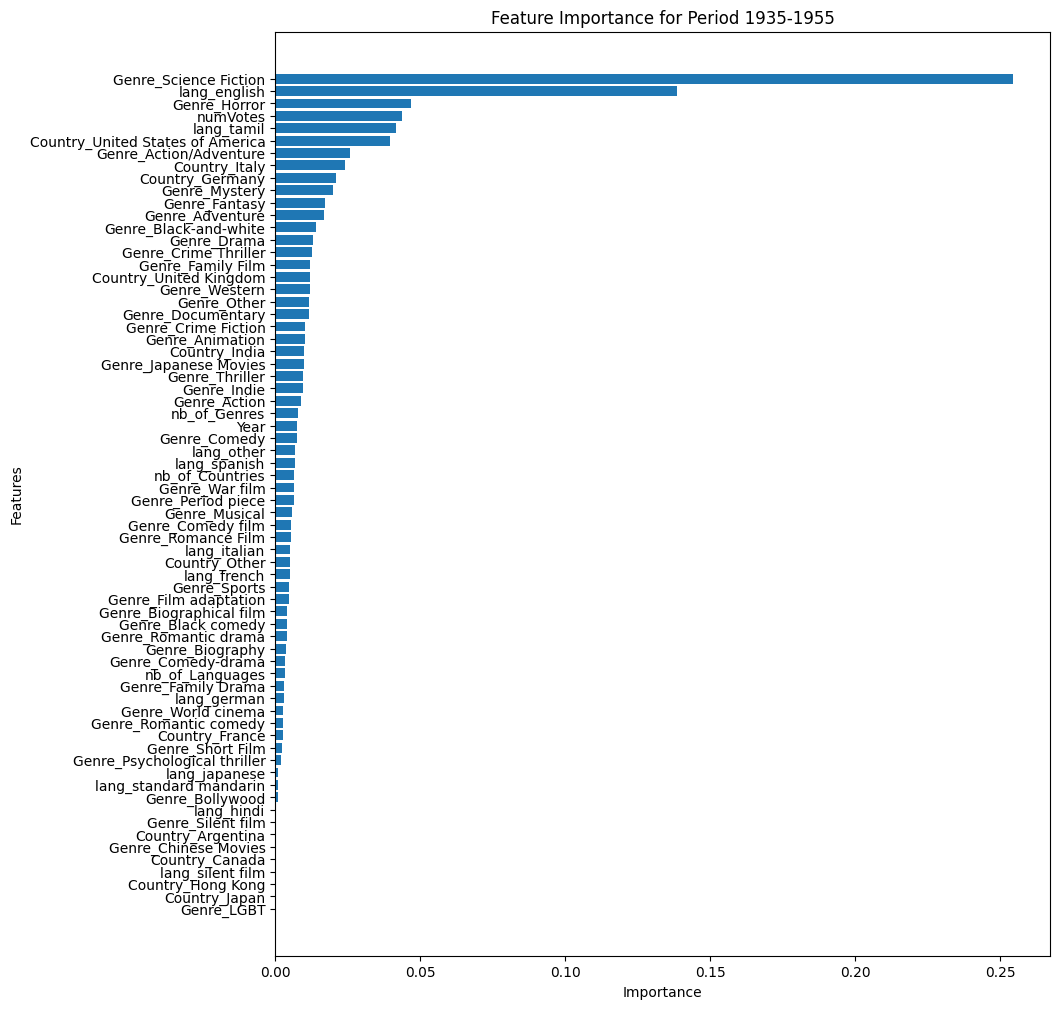

In [24]:
# Iterate through the unique periods in 'Year_interval'
for period in df_mod_2['Year_Interval'].unique():
    print(f"Analyzing period: {period}")
    
    # Filter the DataFrame for the current period
    df_period = df_mod_2[df_mod_2['Year_Interval'] == period]
    
    # Define features and target
    X_ = df_period.drop(columns=['averageRating', 'Year_Interval'])
    y_ = df_period['averageRating']
    
    # Split data
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler_ = StandardScaler()
    X_train_scaled_ = scaler_.fit_transform(X_train_)
    X_test_scaled_ = scaler_.transform(X_test_)
    
    # Train an XGBoost model
    xgb_ = XGBRegressor(random_state=42)
    xgb_.fit(X_train_scaled_, y_train_)
    y_pred_xgb_ = xgb_.predict(X_test_scaled_)
    
    # Evaluate the model
    mse_xgb_ = mean_squared_error(y_test_, y_pred_xgb_)
    r2_xgb_ = r2_score(y_test_, y_pred_xgb_)
    print(f"Period {period} - XGBoost MSE: {mse_xgb_:.4f}")
    print(f"Period {period} - XGBoost R2: {r2_xgb_:.4f}")
    
    # Get feature importance for the XGBoost model
    importance_df_xgb_ = pd.DataFrame({
        'Feature': X_.columns,
        'Importance': xgb_.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print(f"Period {period} - XGBoost feature importance:\n", importance_df_xgb_)
    
    # Plot the feature importance for the XGBoost model
    plt.figure(figsize=(10, 12))
    plt.barh(importance_df_xgb_['Feature'], importance_df_xgb_['Importance'])
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f'Feature Importance for Period {period}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


#### Using Random Forest model

Analyzing period: 1975-1995
Period 1975-1995 - Random Forest MSE: 0.5392
Period 1975-1995 - Random Forest R2: 0.5466
Period 1975-1995 - Random Forest feature importance:
                    Feature  Importance
67                numVotes    0.301444
0                     Year    0.088153
18             Genre_Drama    0.073334
50              lang_other    0.059162
44            lang_english    0.053873
..                     ...         ...
53  lang_standard mandarin    0.000652
9    Genre_Black-and-white    0.000596
36        Genre_Short Film    0.000269
51        lang_silent film    0.000002
37       Genre_Silent film    0.000002

[68 rows x 2 columns]


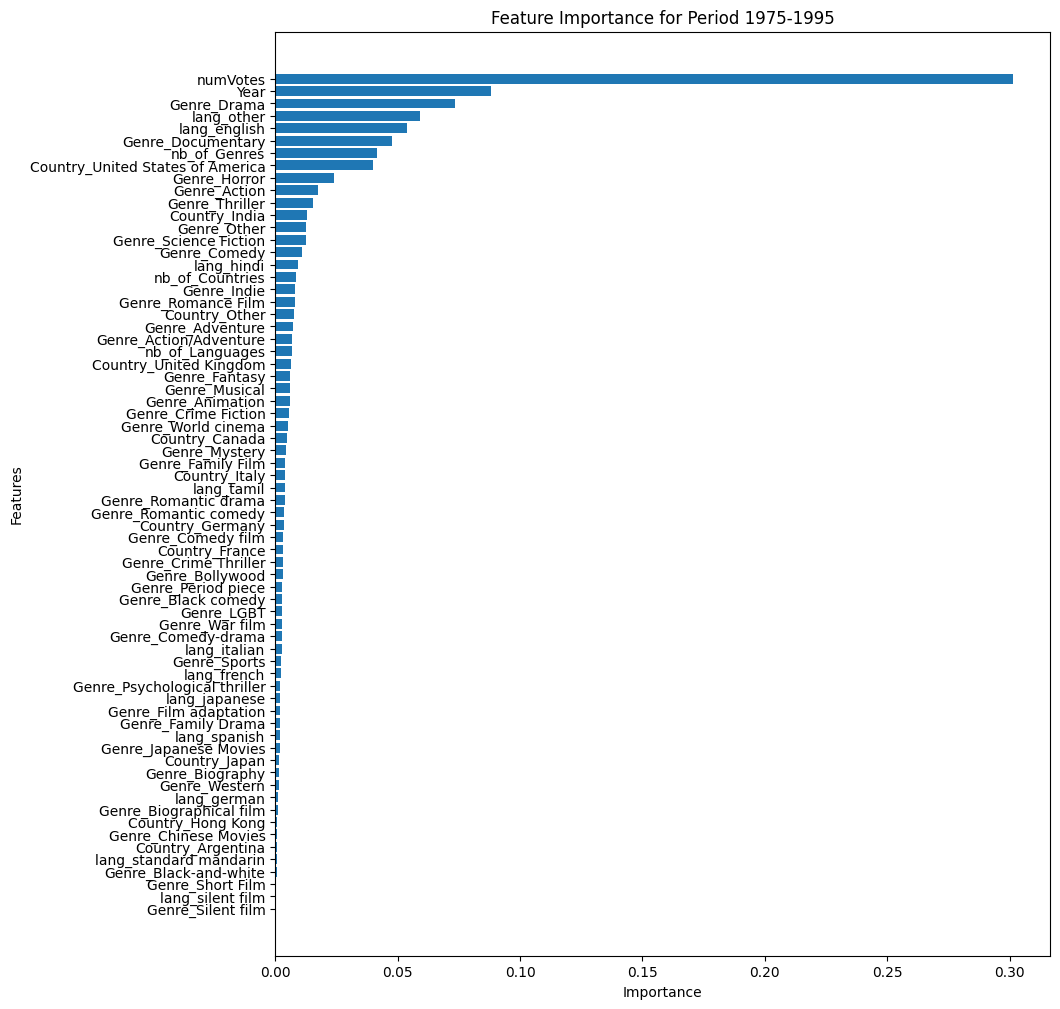

Analyzing period: 1915-1935
Period 1915-1935 - Random Forest MSE: 0.2759
Period 1915-1935 - Random Forest R2: 0.4843
Period 1915-1935 - Random Forest feature importance:
               Feature  Importance
67           numVotes    0.540997
0                Year    0.085724
1        nb_of_Genres    0.048014
39     Genre_Thriller    0.037972
37  Genre_Silent film    0.029235
..                ...         ...
47         lang_hindi    0.000000
56  Country_Argentina    0.000000
60  Country_Hong Kong    0.000000
54         lang_tamil    0.000000
10    Genre_Bollywood    0.000000

[68 rows x 2 columns]


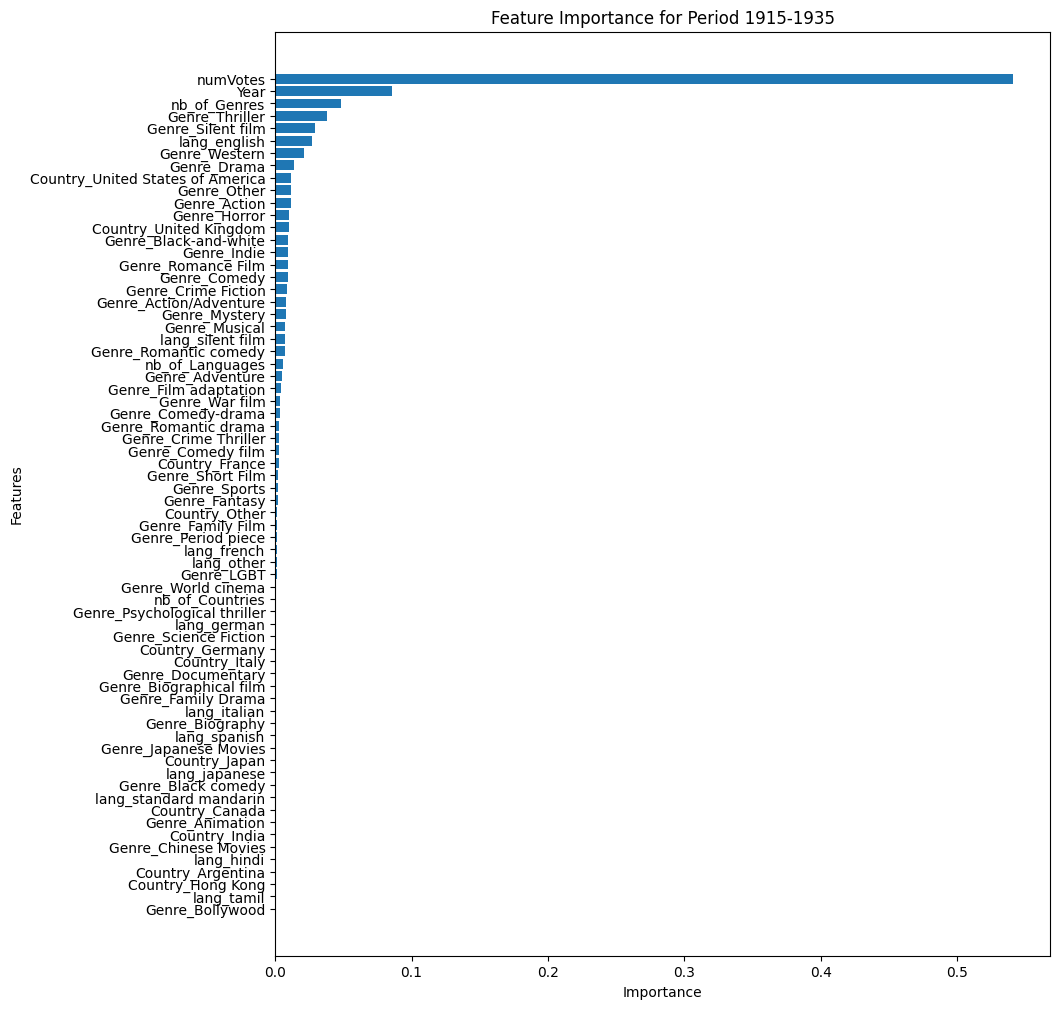

Analyzing period: 1955-1975
Period 1955-1975 - Random Forest MSE: 0.4055
Period 1955-1975 - Random Forest R2: 0.5720
Period 1955-1975 - Random Forest feature importance:
                    Feature  Importance
67                numVotes    0.368897
44            lang_english    0.088560
0                     Year    0.081391
23            Genre_Horror    0.059326
1             nb_of_Genres    0.050264
..                     ...         ...
53  lang_standard mandarin    0.000356
54              lang_tamil    0.000340
60       Country_Hong Kong    0.000319
10         Genre_Bollywood    0.000225
11    Genre_Chinese Movies    0.000214

[68 rows x 2 columns]


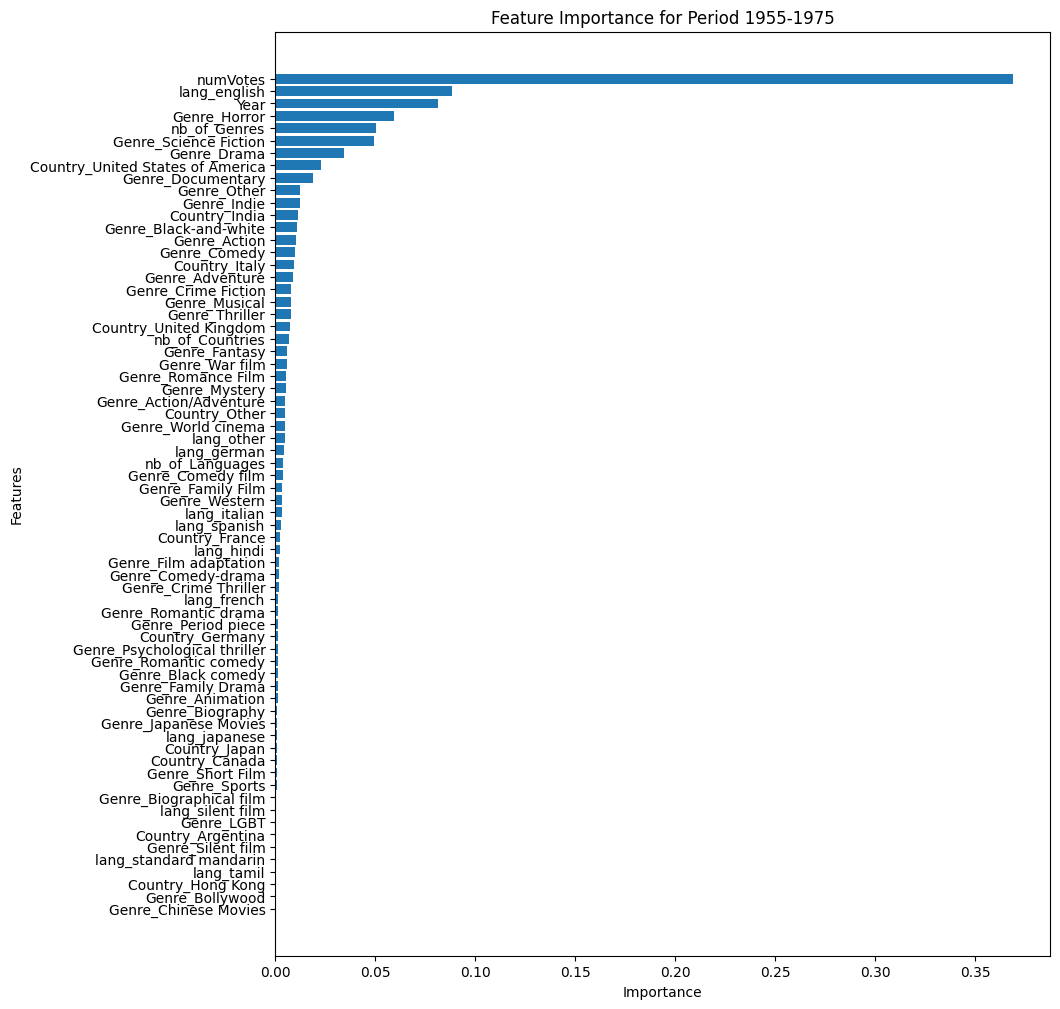

Analyzing period: 1995-2015
Period 1995-2015 - Random Forest MSE: 0.6340
Period 1995-2015 - Random Forest R2: 0.5156
Period 1995-2015 - Random Forest feature importance:
                              Feature  Importance
67                          numVotes    0.304524
0                               Year    0.079031
18                       Genre_Drama    0.067391
17                 Genre_Documentary    0.058336
66  Country_United States of America    0.056334
..                               ...         ...
41                     Genre_Western    0.000658
37                 Genre_Silent film    0.000377
9              Genre_Black-and-white    0.000260
56                 Country_Argentina    0.000236
51                  lang_silent film    0.000065

[68 rows x 2 columns]


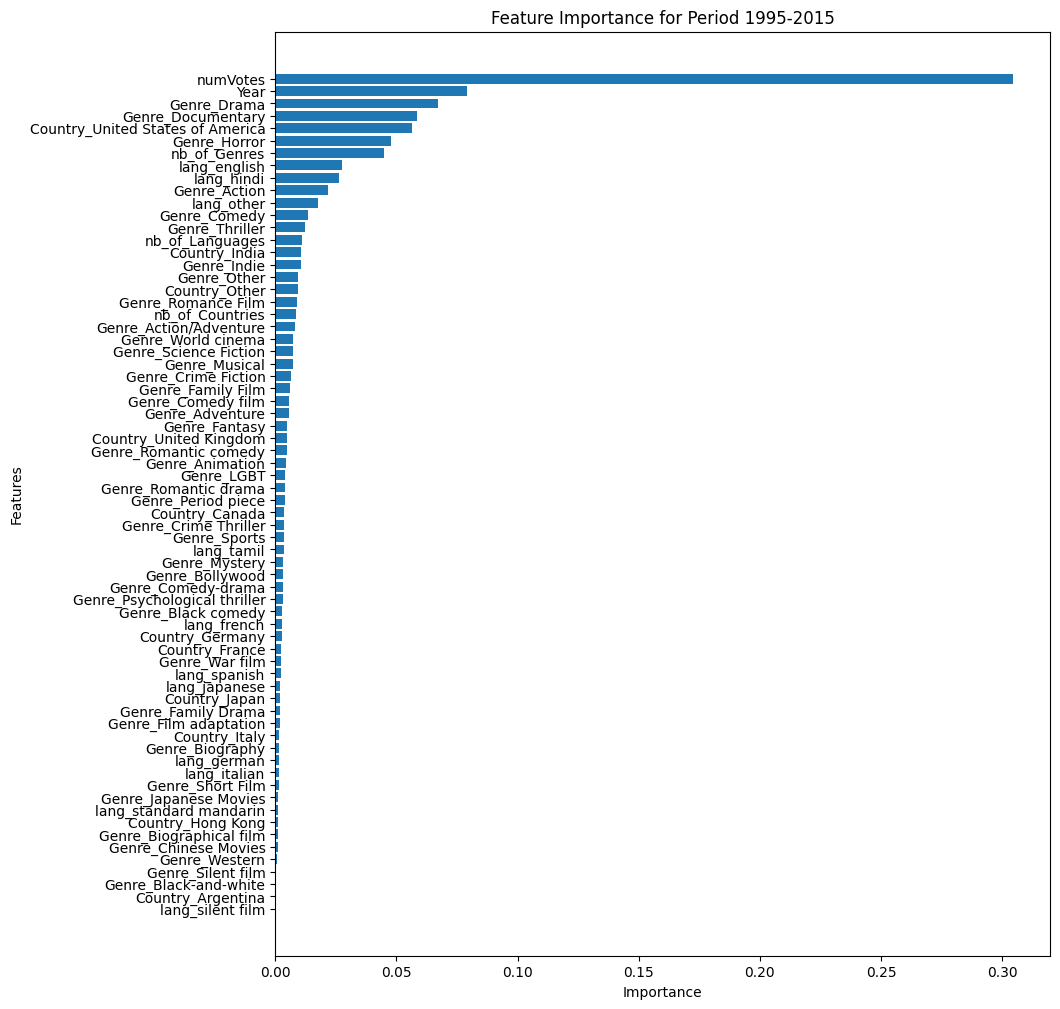

Analyzing period: 1935-1955
Period 1935-1955 - Random Forest MSE: 0.2690
Period 1935-1955 - Random Forest R2: 0.4601
Period 1935-1955 - Random Forest feature importance:
                   Feature  Importance
67               numVotes    0.510773
0                    Year    0.084699
35  Genre_Science Fiction    0.069995
1            nb_of_Genres    0.043074
44           lang_english    0.039858
..                    ...         ...
37      Genre_Silent film    0.000011
26             Genre_LGBT    0.000005
60      Country_Hong Kong    0.000000
57         Country_Canada    0.000000
51       lang_silent film    0.000000

[68 rows x 2 columns]


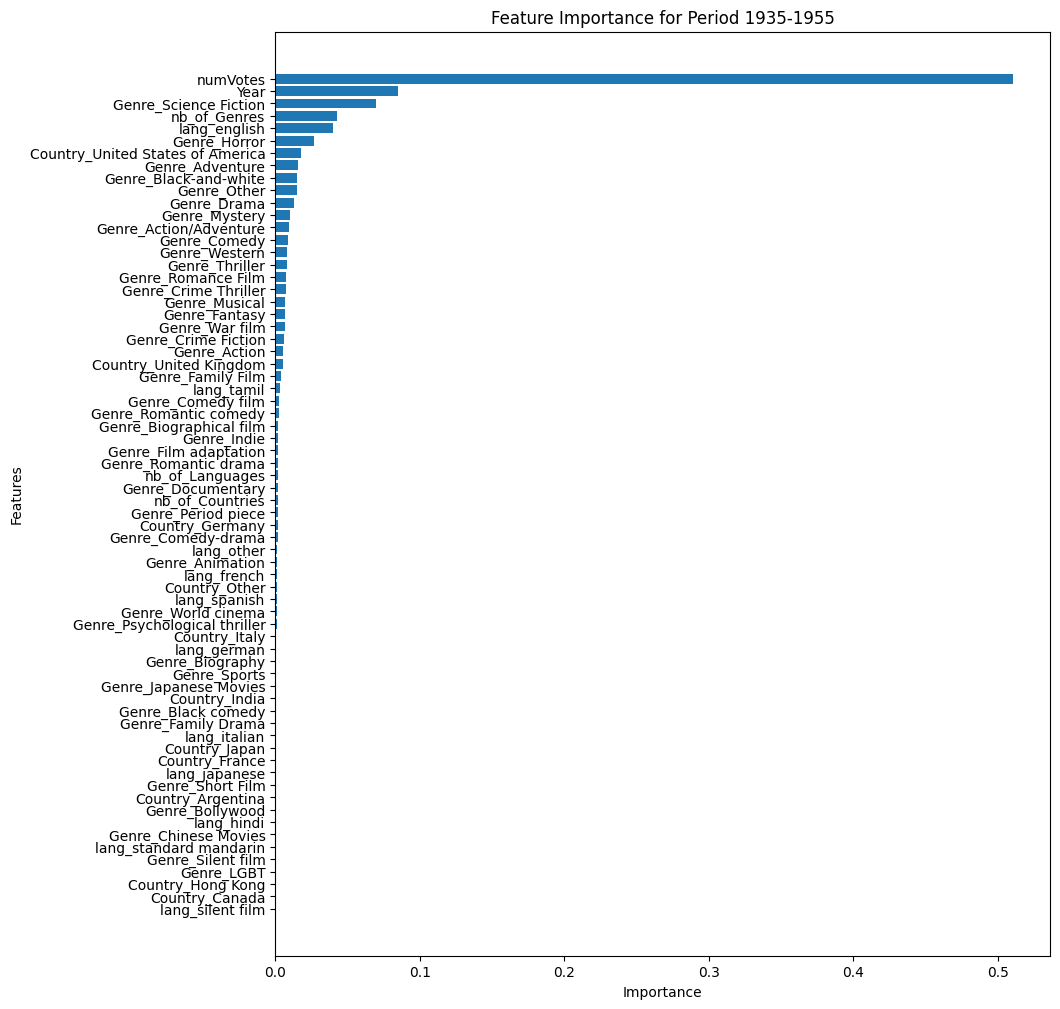

In [25]:
# Iterate through the unique periods in 'Year_Interval'
for period in df_mod_2['Year_Interval'].unique():
    print(f"Analyzing period: {period}")
    
    # Filter the DataFrame for the current period
    df_period = df_mod_2[df_mod_2['Year_Interval'] == period]
    
    # Define features and target
    X_ = df_period.drop(columns=['averageRating', 'Year_Interval'])
    y_ = df_period['averageRating']
    
    # Split data
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler_ = StandardScaler()
    X_train_scaled_ = scaler_.fit_transform(X_train_)
    X_test_scaled_ = scaler_.transform(X_test_)
    
    # Train a Random Forest Regressor
    rf_ = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_.fit(X_train_scaled_, y_train_)
    y_pred_rf_ = rf_.predict(X_test_scaled_)
    
    # Evaluate the model
    mse_rf_ = mean_squared_error(y_test_, y_pred_rf_)
    r2_rf_ = r2_score(y_test_, y_pred_rf_)
    print(f"Period {period} - Random Forest MSE: {mse_rf_:.4f}")
    print(f"Period {period} - Random Forest R2: {r2_rf_:.4f}")
    
    # Get feature importance for the Random Forest model
    importance_df_rf_ = pd.DataFrame({
        'Feature': X_.columns,
        'Importance': rf_.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print(f"Period {period} - Random Forest feature importance:\n", importance_df_rf_)
    
    # Plot the feature importance for the Random Forest model
    plt.figure(figsize=(10, 12))
    plt.barh(importance_df_rf_['Feature'], importance_df_rf_['Importance'])
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f'Feature Importance for Period {period}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
